# Customer Segmentation using Mall Customer Data(Clustering)

In [1]:
# ## 1. Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv(r"/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


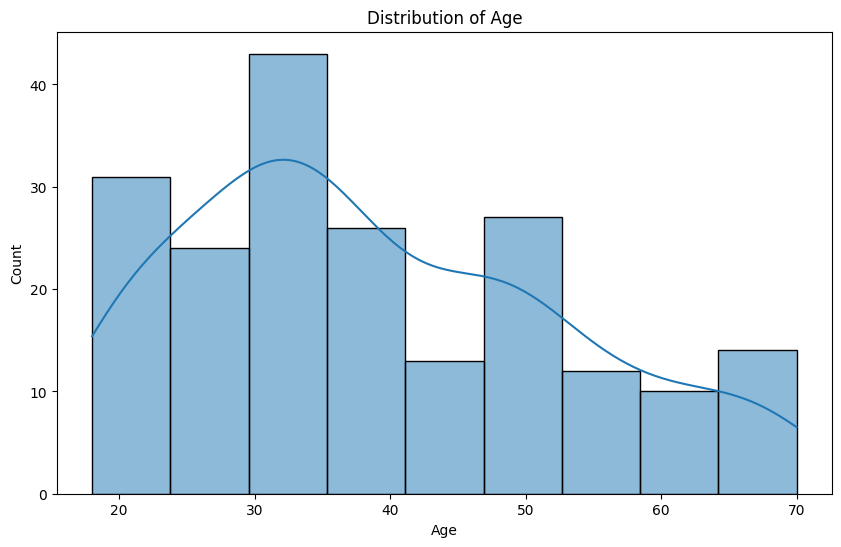

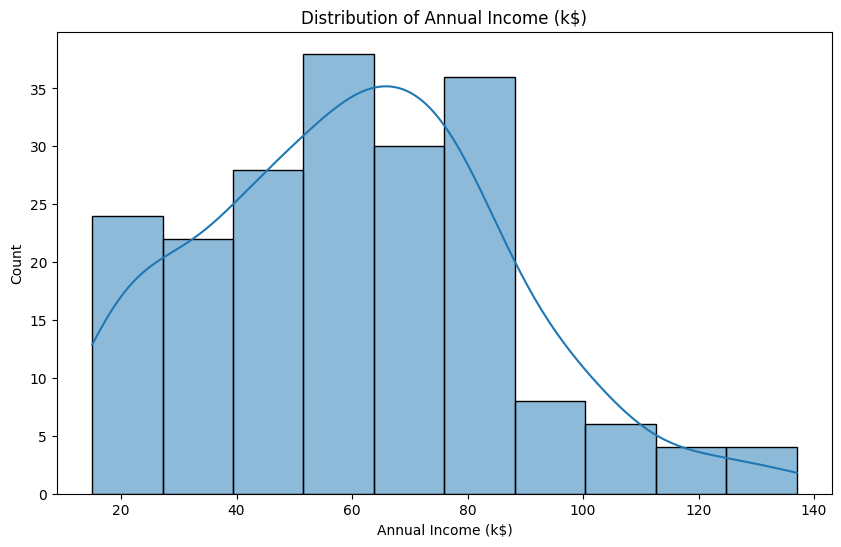

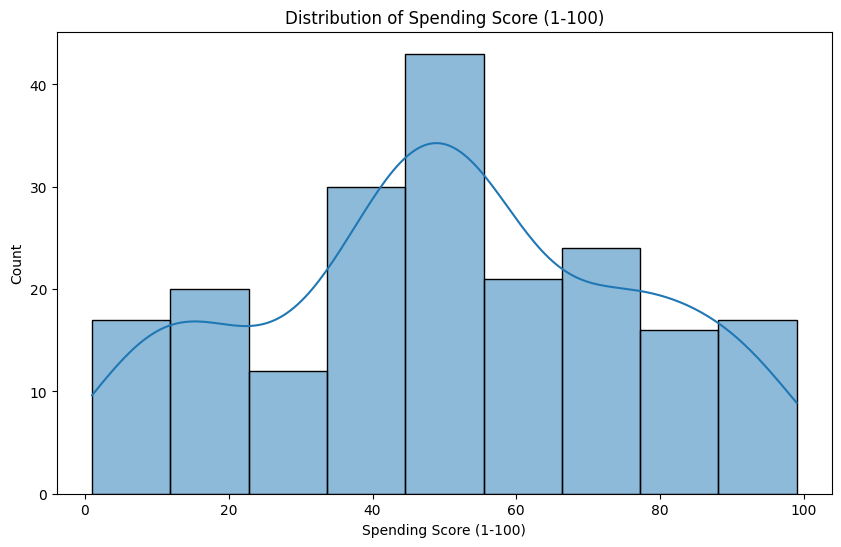

In [5]:
# ### 1.1 Distributions of Age, Annual Income, and Spending Score
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

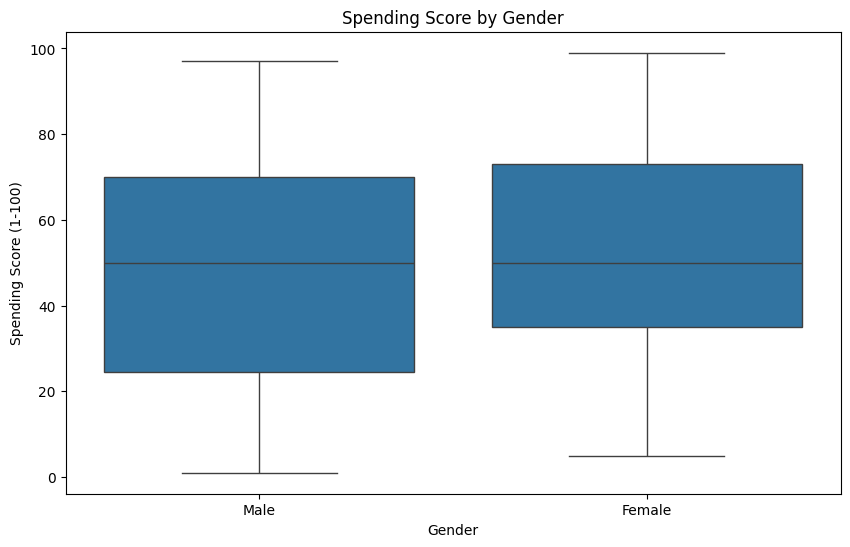

In [6]:
# ### 1.2 Spending Habits by Gender
plt.figure()
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()

In [7]:
# Observation: Females tend to have slightly higher spending scores than males.

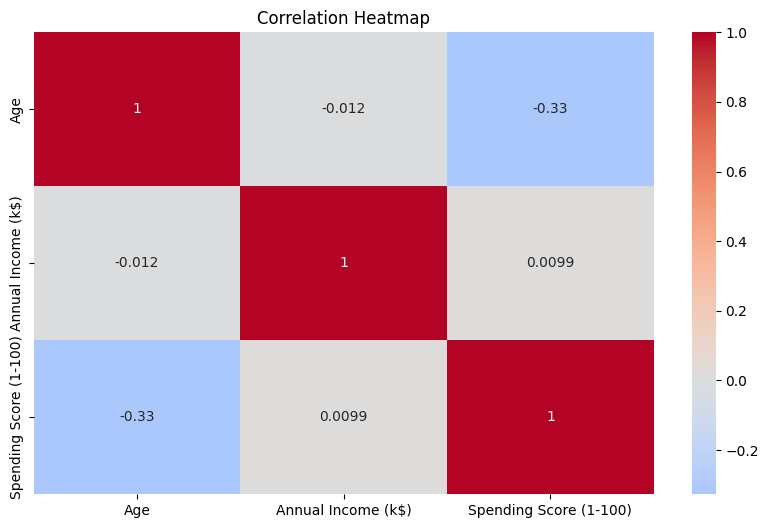

In [8]:
# ### 1.3 Correlation Heatmap
plt.figure()
sns.heatmap(df.drop(['CustomerID', 'Gender'], axis=1).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Observation: No strong correlations between numerical features; suitable for clustering.

In [10]:
# ## 2. Data Preprocessing

# ### 2.1 Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 0, Female: 1

In [11]:
# ### 2.2 Remove CustomerID
X = df.drop('CustomerID', axis=1)

In [13]:
# ### 2.3 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

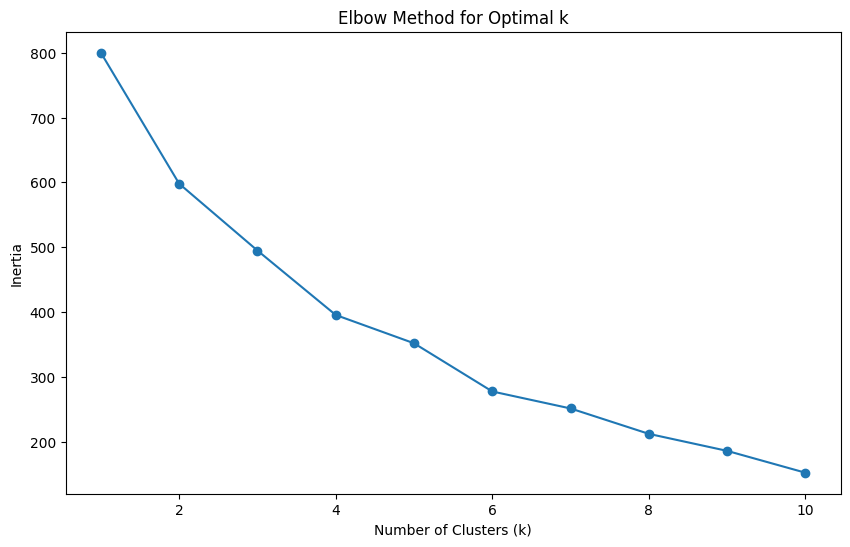

In [14]:
# ## 3. Clustering Models

# ### 3.1 K-Means Clustering
# Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [15]:
# Optimal k ~ 5 based on elbow curve
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

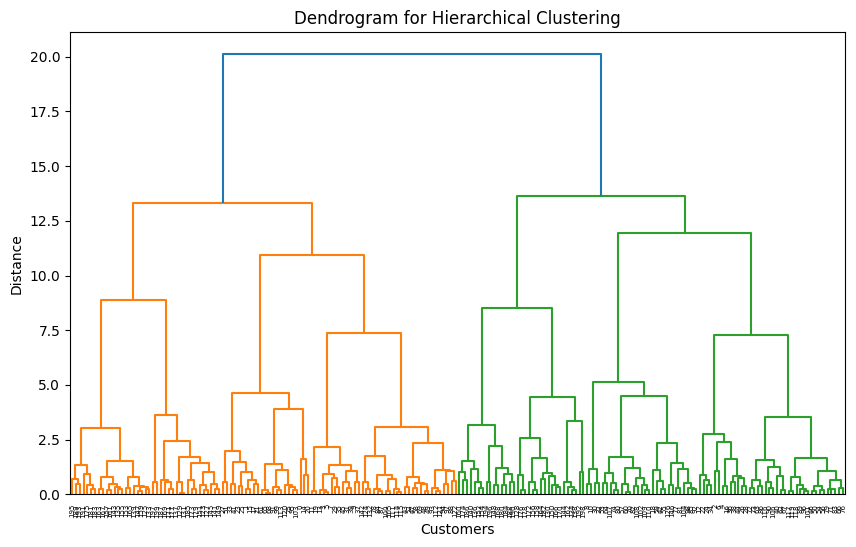

In [16]:
# ### 3.2 Hierarchical Clustering
# Dendrogram analysis
Z = linkage(X_scaled, method='ward')
plt.figure()
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [22]:
# Cut dendrogram at 5 clusters
hierarchical_labels = fcluster(Z, t=5, criterion='maxclust')

In [23]:
# ### 3.3 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
print(f"DBSCAN Clusters: {len(np.unique(dbscan_labels))} (including noise: -1)")

DBSCAN Clusters: 10 (including noise: -1)


In [24]:
# ### 3.4 Visualize Clusters in 2D (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

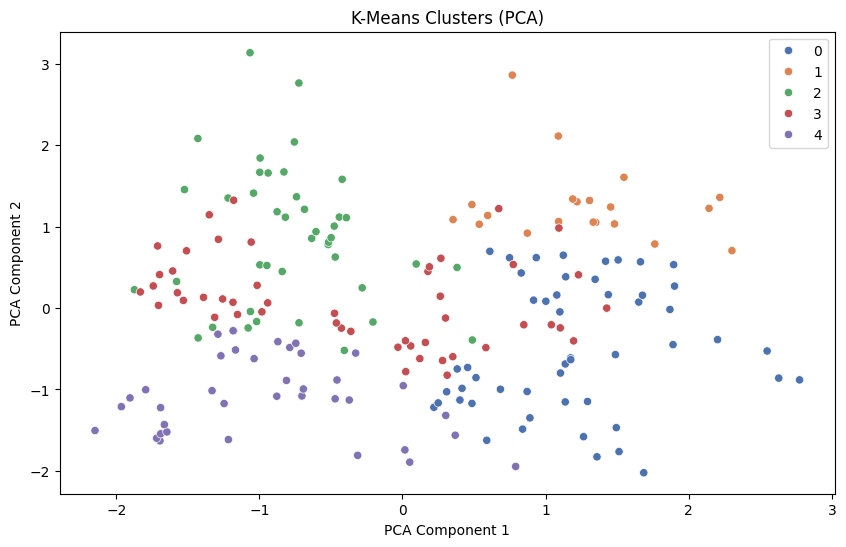

In [25]:
# Plot for K-Means
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='deep')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

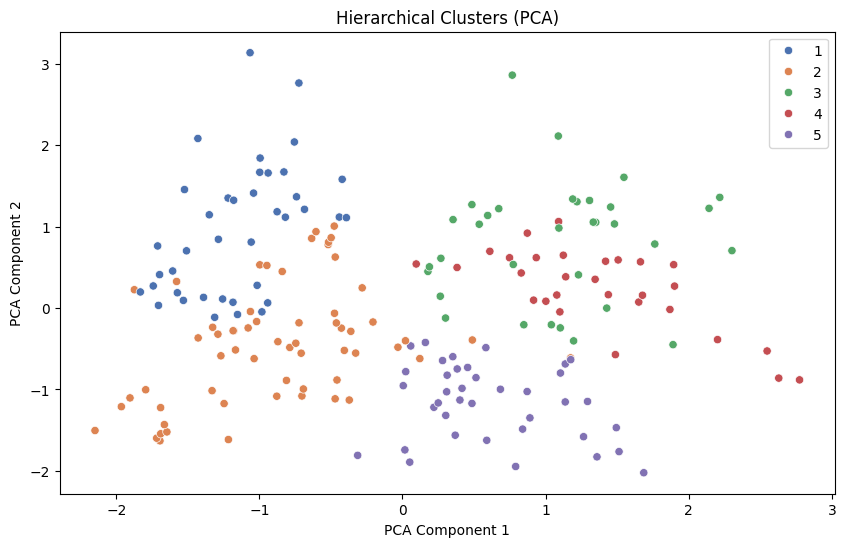

In [26]:
# Plot for Hierarchical
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='deep')
plt.title('Hierarchical Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

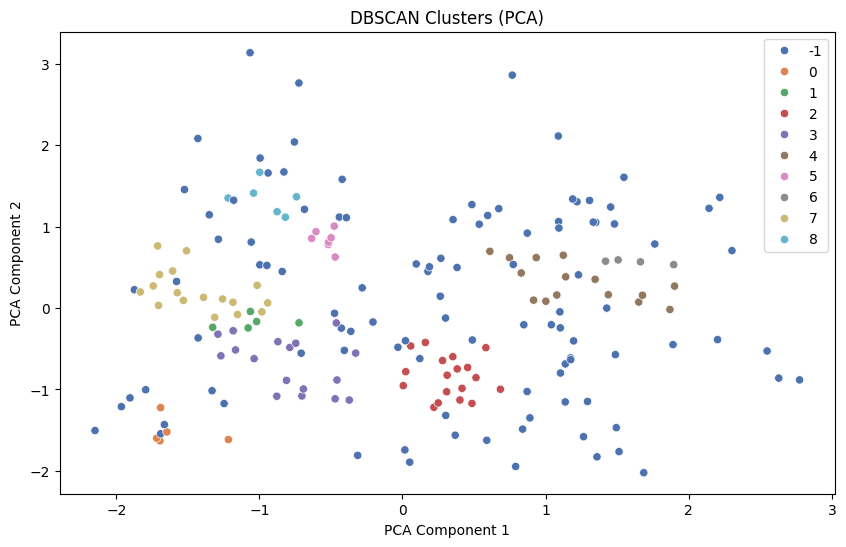

In [27]:
# Plot for DBSCAN
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='deep')
plt.title('DBSCAN Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [28]:
# ## 4. Cluster Analysis

# Add K-Means labels to original data (focus on K-Means due to clear clusters)
df['Cluster'] = kmeans_labels

In [29]:
# Analyze average features per cluster
cluster_summary = df.groupby('Cluster').mean()[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)    Gender
Cluster                                                                 
0        56.470588           46.098039               39.313725  0.509804
1        39.500000           85.150000               14.050000  1.000000
2        28.690476           60.904762               70.238095  1.000000
3        37.897959           82.122449               54.448980  0.000000
4        27.315789           38.842105               56.210526  0.000000


In [42]:
# Label and interpret clusters
cluster_labels = {
    0: "Moderate Income High Spenders",
    1: "High Income Low Spenders",
    2: "High Income High Spenders",
    3: "High Income Moderate Spenders",
    4: "Low Income High Spenders"
}

In [43]:
# Marketing strategies
marketing_strategies = {"Moderate Income High Spenders":"Exclusive but affordable offers: 'Luxury you can afford' campaigns.",
                        "High Income Low Spenders":"Personalized experiences: Invite them to exclusive preview sales or product launches.",
                        "High Income High Spenders":"Exclusive loyalty tiers: VIP or Elite tiers with luxury perks.",
                        "High Income Moderate Spenders":"Milestone incentives:Spend ₹X more to unlock gold tier.",
                        "Low Income High Spenders":"EMI/payment plans: Allow big-ticket purchases with ease."

}

In [44]:
print("\nCluster Labels and Marketing Strategies:")
for cluster, label in cluster_labels.items():
    print(f"Cluster {cluster}: {label}")
    print(f"Marketing Strategy: {marketing_strategies[label]}\n")


Cluster Labels and Marketing Strategies:
Cluster 0: Moderate Income High Spenders
Marketing Strategy: Exclusive but affordable offers: 'Luxury you can afford' campaigns.

Cluster 1: High Income Low Spenders
Marketing Strategy: Personalized experiences: Invite them to exclusive preview sales or product launches.

Cluster 2: High Income High Spenders
Marketing Strategy: Exclusive loyalty tiers: VIP or Elite tiers with luxury perks.

Cluster 3: High Income Moderate Spenders
Marketing Strategy: Milestone incentives:Spend ₹X more to unlock gold tier.

Cluster 4: Low Income High Spenders
Marketing Strategy: EMI/payment plans: Allow big-ticket purchases with ease.



In [45]:
# ## 5. Bonus: Gaussian Mixture Models (GMM)

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

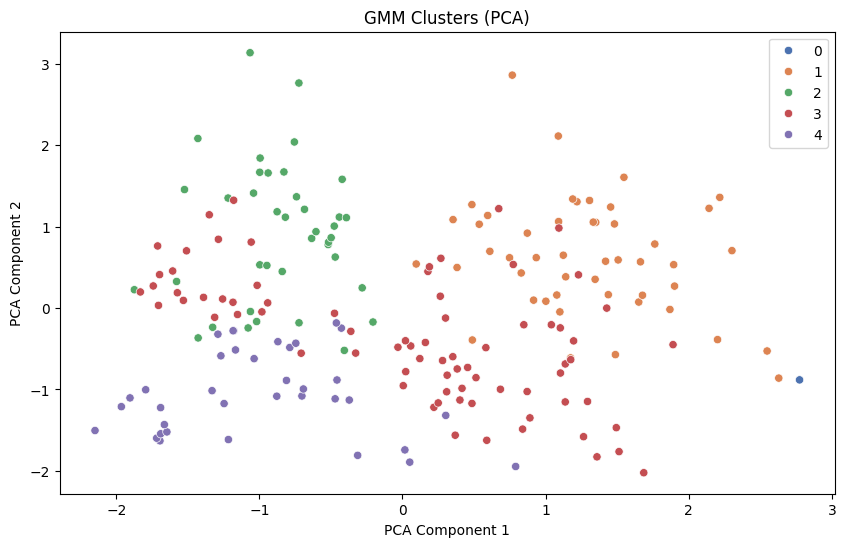

In [46]:
# Compare with K-Means
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='deep')
plt.title('GMM Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [47]:
# Observation: GMM clusters are similar to K-Means but with probabilistic assignments.

In [48]:
# ## 6. Export Model and Create Gradio Interface

import pickle
import json
import gradio as gr

In [49]:
# Export model and column information
with open('customer_segmentation_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [50]:
# Load model and columns for prediction
with open('customer_segmentation_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('columns.json', 'r') as f:
    data_columns = json.load(f)['data_columns']

In [51]:
# Prediction function
def predict_segment(gender, age, annual_income, spending_score):
    x = np.zeros(len(data_columns))

    # Set inputs (scale numerical features)
    x[data_columns.index('gender')] = 1 if gender == 'Female' else 0
    x[data_columns.index('age')] = (age - df['Age'].mean()) / df['Age'].std()
    x[data_columns.index('annual income (k$)')] = (annual_income - df['Annual Income (k$)'].mean()) / df['Annual Income (k$)'].std()
    x[data_columns.index('spending score (1-100)')] = (spending_score - df['Spending Score (1-100)'].mean()) / df['Spending Score (1-100)'].std()

    # Predict cluster
    cluster = model.predict([x])[0]
    label = cluster_labels.get(cluster, "Unknown")

    return f"Predicted Segment: {label}\nMarketing Strategy: {marketing_strategies[label]}"

In [52]:
# Gradio Interface
iface = gr.Interface(
    fn=predict_segment,
    inputs=[
        gr.Dropdown(choices=['Male', 'Female'], label="Gender", value='Male'),
        gr.Slider(minimum=18, maximum=70, step=1, label="Age", value=30),
        gr.Slider(minimum=15, maximum=137, step=1, label="Annual Income (k$)", value=50),
        gr.Slider(minimum=1, maximum=100, step=1, label="Spending Score (1-100)", value=50)
    ],
    outputs="text",
    title="🛍️ Mall Customer Segment Predictor",
    description="Enter customer details to predict their segment and marketing strategy."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://617bc46e3f1009eebb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
